In [1]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train = pd.read_csv('train_E6oV3lV.csv')
print('train data shape: ', train.shape)
test = pd.read_csv('test_tweets_anuFYb8.csv')
print('test data shape: ', test.shape)
train.head()

train data shape:  (31962, 3)
test data shape:  (17197, 2)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [3]:
# non-racist tweets
train[train.label == 0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
# racist tweets
train[train.label == 1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


In [3]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

We have unbalanced classes. Only 2242 (7%) racist labels whereas 29720 (93%) non-racist labels. 

*Distribution of Length of tweets*

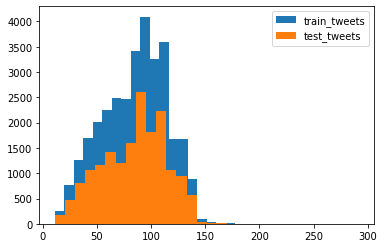

In [4]:
train_length = train['tweet'].str.len()
test_length = test['tweet'].str.len()
plt.hist(train_length, bins=30, label='train_tweets')
plt.hist(test_length, bins=30, label='test_tweets')
plt.legend()

Let us first clean the data. We will apply the following preprocessing
1. Remove twitter handles '@user' as it does not provide any useful info for sentiments
2. Create a separate column for hastags
3. Remove punctuation and other special characters (We may need to keep this to analyze emojis or detect sarcasm *#To Do*
4. Remove short words of length less than 3 (words like hmm, oh)
5. Text normalization (lower casing, stemming)

In [5]:
from nltk.stem.porter import * 

def preprocess_text(data):
    
    # remove twitter handles ex '@user'
    data['clean_tweet'] = data['tweet'].str.replace(r'@[\w]*', '')
    
    # the tweets have a lot of unwanted characters. But before removing the punctuation,
    # let us create a separate column for hashtags as they play a important role in summarizing the tweet
    data['hashtag'] = data['clean_tweet'].str.findall(r'#[\w]+')
    
    # replace everything except characters and hashtags with spaces
    data['clean_tweet'] = data['clean_tweet'].str.replace(r'[^a-zA-Z#]', ' ')
    
    # remove short words
    data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    
    # we will apply stemming using NLTK Porter Stemmer. We first tokenize the text, apply stemming and join the words
    stemmer = PorterStemmer()
    data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([stemmer.stem(w) for w in x.split()]))
    

In [6]:
preprocess_text(train)
train.head()

,id,label,tweet,clean_tweet,hashtag
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run,[#run]
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank,"[#lyft, #disapointed, #getthanked]"
2,3,0,bihday your majesty,bihday your majesti,[]
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time,[#model]
4,5,0,factsguide: society now #motivation,factsguid societi #motiv,[#motivation]


Let us create Word Clouds to get a sense of most frequent words present in the text.

(-0.5, 599.5, 399.5, -0.5)

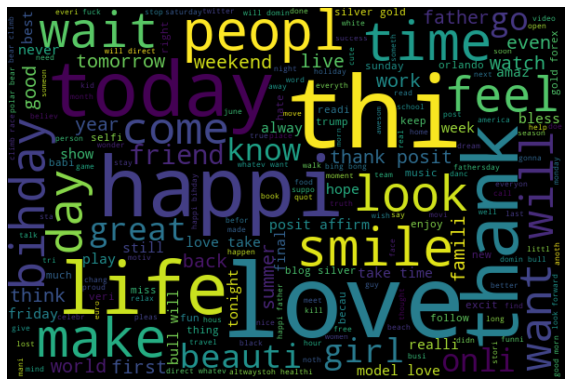

In [8]:
from wordcloud import WordCloud, STOPWORDS

# combine all the tweets
text = ' '.join([sent for sent in train['clean_tweet']])
wordcloud = WordCloud(width=600, height=400, random_state=21, max_font_size=110).generate(text)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')

Now, we shall create word clouds separately for racist/non-racist text to understand the differences better. We will also remove the stopwords in these tweets while create the word clouds

In [9]:
stopwords = set(STOPWORDS)
non_racist_text =' '.join([sent for sent in train['clean_tweet'][train['label'] == 0]])
racist_text =' '.join([sent for sent in train['clean_tweet'][train['label'] == 1]])

(-0.5, 799.5, 499.5, -0.5)

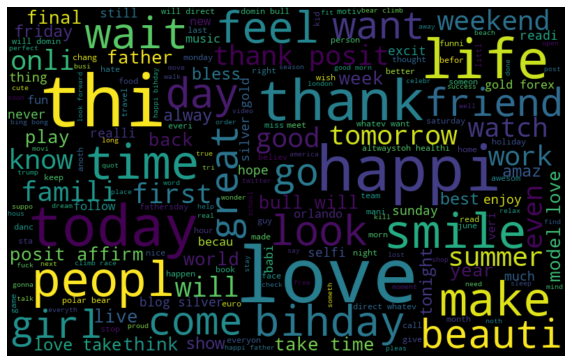

In [10]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords=stopwords).generate(non_racist_text)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')

(-0.5, 799.5, 499.5, -0.5)

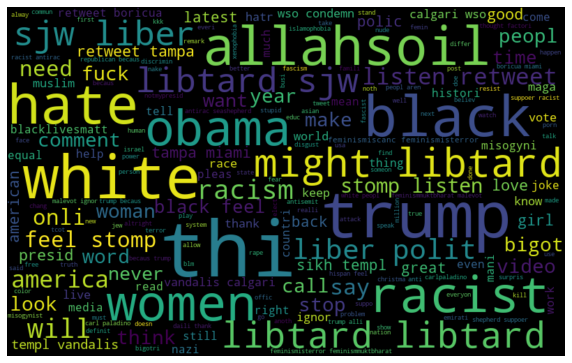

In [11]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords=stopwords).generate(racist_text)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')

**Analyze Hashtags**<br/>
Hashtags represent the ongoing trends in the tweets and thus help in distinguishing sentiments
We will store racist/non-racist tweets in two separate lists and create plots for the top n hashtags

In [12]:
racist_ht = train.loc[train['label']==1, 'hashtag']
non_racist_ht = train.loc[train['label']==0, 'hashtag']

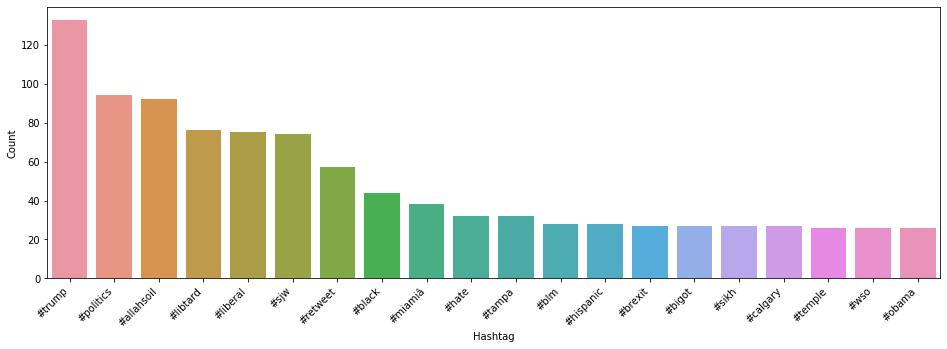

In [14]:
tags_count = nltk.FreqDist(sum(racist_ht, [])) 
racist_df = pd.DataFrame({'Hashtag': list(tags_count.keys()), 'Count': list(tags_count.values())}) 

# selecting top 20 most frequent hashtags     
racist_df = racist_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=racist_df, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count')
gr = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

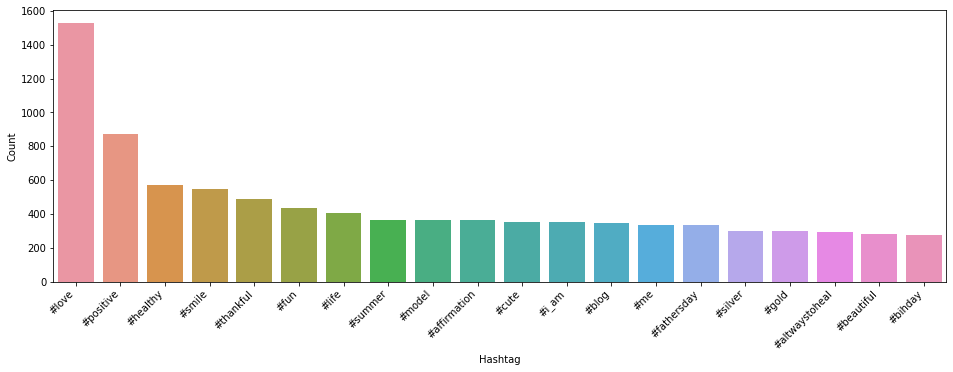

In [15]:
tags_count = nltk.FreqDist(sum(non_racist_ht, [])) 
non_racist_df = pd.DataFrame({'Hashtag': list(tags_count.keys()), 'Count': list(tags_count.values())}) 

# selecting top 20 most frequent hashtags     
non_racist_df = non_racist_df.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=non_racist_df, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count')
gr = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

We will build the following feature sets to analyze the data
1. Bag of Words
2. Tf-Idf
3. Word Embeddings

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

bow_vect = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vect.fit_transform(train['clean_tweet']) 
bow.shape

(31962, 1000)

In [18]:
tfidf_vect = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vect.fit_transform(train['clean_tweet']) 
tfidf.shape

(31962, 1000)

In [19]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

NameError: name 'combi' is not defined

In [ ]:
model_w2v.wv.most_similar(positive="dinner")

In [ ]:
model_w2v.wv.most_similar(positive="trump")

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary                                     continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays) wordvec_df.shape    


In [ ]:
from tqdm import 
tqdm tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output
labeled_tweets = add_label(tokenized_tweet) # label all the tweets
labeled_tweets[:6]

In [ ]:
# train a doc2vec model.

model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   dm_mean=1, # dm = 1 for using mean of the context word vectors                                  size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 min_count=5, # Ignores all words with total frequency lower than 2.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23) 
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

In [ ]:
# Preparing doc2vec Feature Set
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape